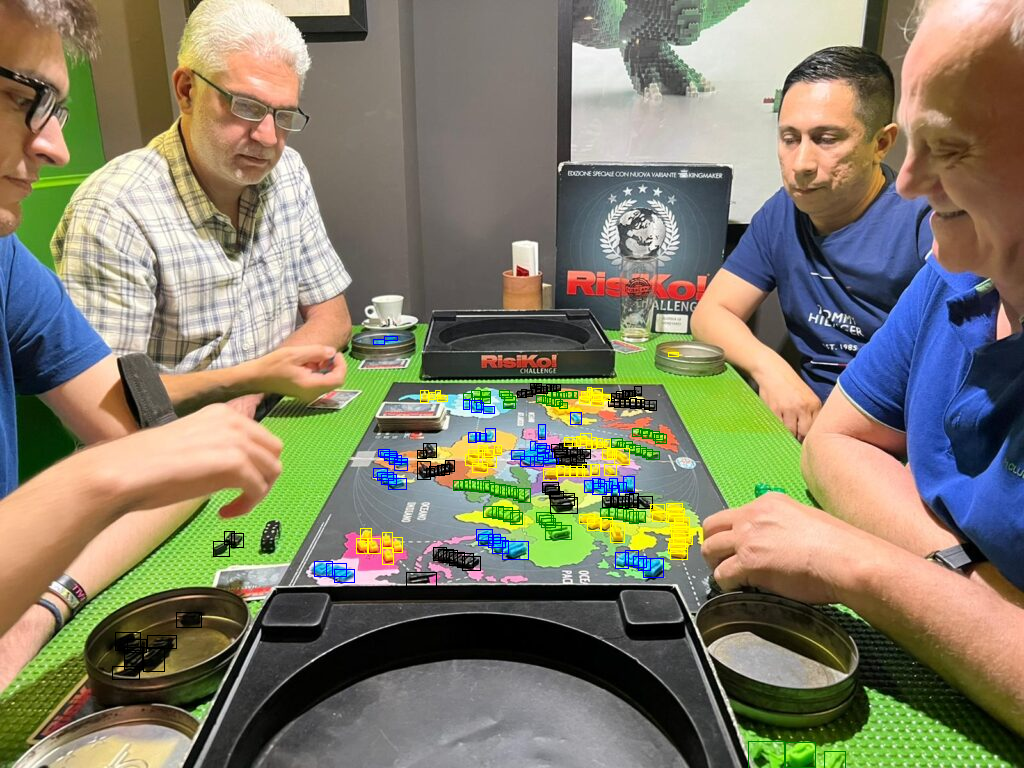

In [1]:
import os
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

colors = [
    "blue",
    "red",
    "yellow",
    "purple",
    "black",
    "green"
]

#n = 100
#img_id = np.random.randint(n)
#img_path = "generated_dataset/images/" + str(img_id).zfill(8) + ".jpg"
#lbl_path = "generated_dataset/labels/" + str(img_id).zfill(8) + ".txt"
img_path = "Professor_Material/real_images/images/" + "000019" + ".jpg"
lbl_path = "Professor_Material/real_images/labels/" + "000019" + ".txt"

img = Image.open(img_path)
boxes = np.genfromtxt(fname= lbl_path, delimiter=' ', dtype=np.float32)

boxes[:, 1:] *= np.array([img.width, img.height, img.width, img.height], dtype=np.float32)
box_coords = boxes[:, 1:].round()#.astype(np.int32)

img_draw = ImageDraw.Draw(img)

for i in range(box_coords.shape[0]):
    bbox = box_coords[i]

    x0 = bbox[0] - bbox[2] / 2
    x1 = bbox[0] + bbox[2] / 2
    y0 = bbox[1] - bbox[3] / 2
    y1 = bbox[1] + bbox[3] / 2

    img_draw.rectangle([x0, y0, x1, y1], outline=colors[int(boxes[i,0])%6])
        
display(img)